<h2>Time Series Analysis</h2>

_In this analysis, you just have one variable i.e. Time_ 

<h3>What is Time Series ?</h3>
It is a set of observations taken at specified times usually at equal intervals.<br>
Used to predict future values based on the previous observed values.<br>
On a time series plot on X axis plot you get the time which is equally divided into equal intervals.<br>

<h3>Components of Time Series</h3>
    1. <b>Trend</b><br>
    a movement to relatively higher or lower values over a long period of time, a relatively up going chart is called uptrend and similary for       downtrend, a no pattern is called stationary trend<br>
    trend is something that happens for sometimes and then it disappears.<br>
    <br>
    2. <b>Seasonality</b></br>
    a <b>repeating pattern</b> within a fixed time period.<br>
    <br>
    3. <b>Irregularity</b></br>
    unsystematic, noise, happens for short-duration and is non-repeating<br>
    consider a flood in a town due to which sales of meds & ointments shoot up (which was not predicted) and suddenly gone down after everything settles up.<br>
    <br>
    4. <b>Cyclic</b></br>
    repeating up and down movements, keep on repeating but are much harder to predict<br> 

<h3>When not to use TSA ?</h3>
1. When the values are constant (coffee sales have been almost same each month).<br>
2. When the values follow a mathematical function (no point in applying tsa because the results can be predicted only by putting values in function).<br>  

<h3>What is Stationarity ?</h3>
https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322<br>
<br>
1. It says that <b>statistical properties</b> of a process generating a time series not themself change over time.<br>
2. It <b>does not mean</b> that the series does not change over time, just that the <b>way it changes does not itself change over time</b>.<br>
3. In algebraic terms: thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant i.e. it <b>has a constant slope</b>.<br>
4. <b>Importance: </b> processes should be possible to predict, as <b>the way they change is predictable</b><br>
5. Most models work on assumption that time series is stationary.<br>
6. 2 major reasons behind the non stationary behaviour of time series:<br> 
<pre>a. <b>Trend</b> (this enables variation in mean over time, whereas stationarity assumes mean to stay constant throughout).</pre>
<pre>b. <b>Seasonality</b> (this is a variations over a specific time frame).</pre><br>  

Stationarity assumes: 1. constant mean 2. constant variance 3. autocovariance that does not depend upon time

https://miro.medium.com/max/700/1*tkx0_wwQ2JT7pSlTeg4yzg.png

<h3>Tests to check Stationarity</h3>
1. <b>Rolling Statistics</b><br>
Plot moving avg and check if that varies over time.<br>
2. <b>ADCF(Augmented Dickey-Fuller) Test</b><br>
Null hypothesis is that time series is non Stationary. In result we have a test statistic and critical values (if test statistic is less than critical value then we reject null hyp and say series is Stationary).<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
df_month_indexed = dataset.set_index(['Month'])

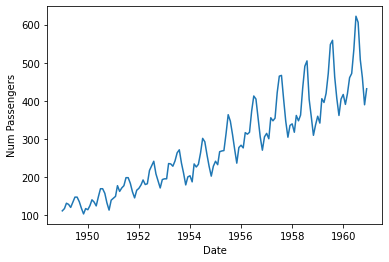

In [3]:
plt.xlabel('Date')
plt.ylabel('Num Passengers')
plt.plot(df_month_indexed)
plt.show()

<h4>NOTE: Above data is not stationary due to upward trend or you can say mean is not constant and it is increasing with each time frame.</h4>

<h3>Applying tests</h3>

In [73]:
from statsmodels.tsa.stattools import adfuller
def plot_moving_average(df_t, value_column, win=12):
    # if mean and std are not constant then data is not stationary.
    rolling_statistics_mean = df_t.rolling(window=win).mean()
    rolling_statistics_std = df_t.rolling(window=win).std()
    
    orig = plt.plot(df_t, color = 'blue', label = 'Time series (Month)')
    rolling_statistics_mean_plot = plt.plot(rolling_statistics_mean, color = 'Red', label = 'Rolling Statistics (Mean)')
    rolling_statistics_std_plot = plt.plot(rolling_statistics_std, color = 'Green', label = 'Rolling Statistics (Std Dev)')
    plt.legend(loc = 'best')
    plt.title('Rolling Statistics Test')
    plt.show(block = False)

    # adcf test
    df_temp = df_t.copy(deep = True)
    df_temp = df_temp[~df_temp[value_column].isnull()]
    ad_fuller_mean = adfuller(df_temp[value_column], autolag = 'AIC')
    ad_fuller_mean_output = pd.Series(ad_fuller_mean[0:4], index = ['Test Statistic', 'p-value', 'Num lags', 'Num observations'])
    for key, value in ad_fuller_mean[4].items():
        ad_fuller_mean_output['Critical value (%s)'%key] = value
    print(ad_fuller_mean_output)

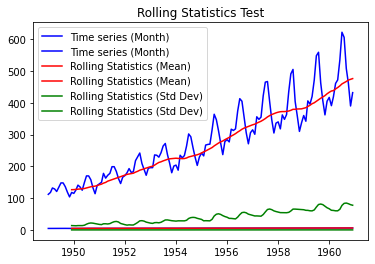

Test Statistic            0.815369
p-value                   0.991880
Num lags                 13.000000
Num observations        130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [74]:
plot_moving_average(df_month_indexed,'#Passengers', 12)

_from above results p-value >> 0.5 and test statistic >> critical values hence we can conclude null hyp cannot be rejected and hence ts is non stationary_

<h3>Estimating Trend</h3>

Approach 1: try converting values to log equivalent

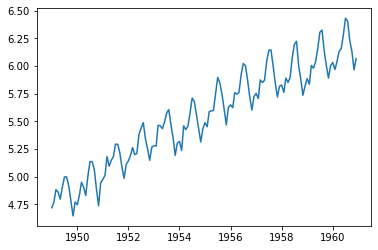

In [75]:
import numpy as np
df_month_indexed['Log equivalent'] = np.log(df_month_indexed['#Passengers'])
plt.plot(df_month_indexed.index, df_month_indexed['Log equivalent'])

In [76]:
# though values of y have changed but trend remain same

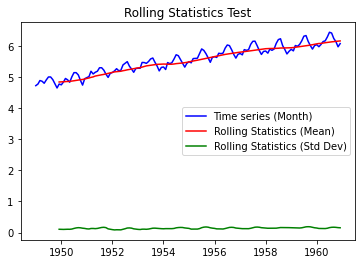

Test Statistic           -1.717017
p-value                   0.422367
Num lags                 13.000000
Num observations        130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [77]:
logScale_month_indexed = pd.DataFrame(df_month_indexed.index, df_month_indexed['Log equivalent'])
logScale_month_indexed.reset_index(inplace=True)
logScale_month_indexed.set_index(['Month'], inplace=True)
plot_moving_average(logScale_month_indexed, 'Log equivalent', 12)

_as observed p value < 0.5 but critical value > test statistic, hence ts not yet stationary_

Approach 2: log equivalent - moving average

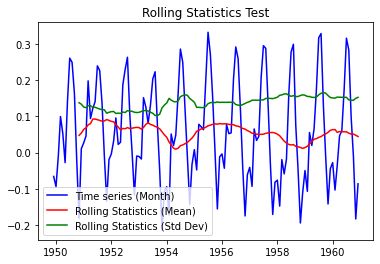

Test Statistic           -3.162908
p-value                   0.022235
Num lags                 13.000000
Num observations        119.000000
Critical value (1%)      -3.486535
Critical value (5%)      -2.886151
Critical value (10%)     -2.579896
dtype: float64


In [78]:
log_scale_moving_avg = logScale_month_indexed.rolling(window = 12).mean()
# remove null values
log_scale_moving_avg.dropna(inplace=True)

# this is not std way to make ts stationary, this depends on your data
logScale_month_indexed_minus_moving_avg = logScale_month_indexed - log_scale_moving_avg
plot_moving_average(logScale_month_indexed_minus_moving_avg, 'Log equivalent', 12)